In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("E:\\Data Science\\8.Machine Learning Algorithms\\2.Classification\\penguins_size.csv")

In [4]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
df.shape

(344, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [8]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [11]:
df.shape

(334, 7)

In [15]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first = True)
y = df["species"]

In [17]:
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,0,1
1,39.5,17.4,186.0,3800.0,0,1,1,0
2,40.3,18.0,195.0,3250.0,0,1,1,0
4,36.7,19.3,193.0,3450.0,0,1,1,0
5,39.3,20.6,190.0,3650.0,0,1,0,1
...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,1,0
340,46.8,14.3,215.0,4850.0,0,0,1,0
341,50.4,15.7,222.0,5750.0,0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,1,0


In [21]:
df.sex.unique()

array(['MALE', 'FEMALE'], dtype=object)

In [22]:
df = df[df["sex"]!='.']

In [23]:
df.shape

(333, 7)

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=101)

In [31]:
from sklearn.ensemble  import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,random_state=101)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [33]:
y_pred_test = model.predict(X_test)

In [34]:
y_pred_train = model.predict(X_train)

In [35]:
#evaluation

In [43]:
from sklearn.metrics import accuracy_score
print("Test Accuracy_Score:",accuracy_score(y_test,y_pred_test))
print("Train Accuracy Score:",accuracy_score(y_train,y_pred_train))

Test Accuracy_Score: 0.9701492537313433
Train Accuracy Score: 1.0


In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_test)

array([[28,  1,  0],
       [ 1, 18,  0],
       [ 0,  0, 19]], dtype=int64)

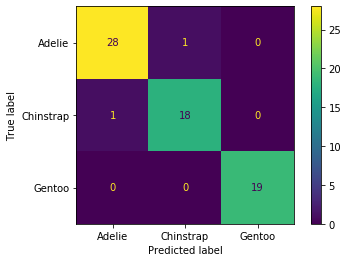

In [48]:
from sklearn.metrics import plot_confusion_matrix,classification_report
plot_confusion_matrix(model,X_test,y_test)
plt.show()

In [50]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        29
   Chinstrap       0.95      0.95      0.95        19
      Gentoo       1.00      1.00      1.00        19

    accuracy                           0.97        67
   macro avg       0.97      0.97      0.97        67
weighted avg       0.97      0.97      0.97        67



In [52]:
model.feature_importances_

array([0.29414326, 0.0979302 , 0.1874959 , 0.17814443, 0.19292447,
       0.03843172, 0.00893623, 0.0019938 ])

In [55]:
# lets plot Accuracy vs No of Estimators

test_acc=[]
train_acc= []

for n in range(1,40):
    model = RandomForestClassifier()
    model.fit(X_train,y_train)
    
    train_preds  =model.predict(X_train)
    train_acc.append(accuracy_score(y_train,train_preds))
    
    test_preds = model.predict(X_test)
    test_acc.append(accuracy_score(y_test,test_preds))


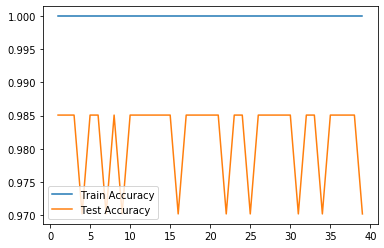

In [60]:
plt.plot(range(1,40),train_acc,label = "Train Accuracy")
plt.plot(range(1,40),test_acc,label="Test Accuracy")
plt.legend()
plt.show()

# Random Forest HyperParameter

In [66]:
from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators":[26,64,100,128,200],"max_features":[2,3,4]}
rfc = RandomForestClassifier()

grid = GridSearchCV(rfc,param_grid,cv=5,scoring ="accuracy")
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [67]:
grid.best_params_

{'max_features': 2, 'n_estimators': 26}

In [68]:
predictions = grid.predict(X_test)

In [69]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.98        29
   Chinstrap       1.00      0.95      0.97        19
      Gentoo       1.00      1.00      1.00        19

    accuracy                           0.99        67
   macro avg       0.99      0.98      0.99        67
weighted avg       0.99      0.99      0.98        67



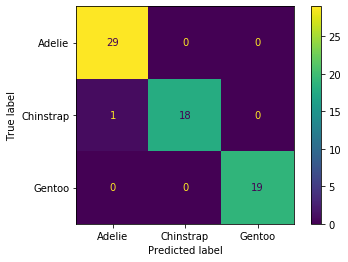

In [72]:
plot_confusion_matrix(grid,X_test,y_test)
plt.show()